# Imports

In [1]:
from os.path import join
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split #for splitting data
from scipy import stats
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

# Retrieve dataset

In [2]:
DS_URL = "https://raw.githubusercontent.com/clintonyeb/ml-dataset/master/BEPS.csv"
FIG_SIZE=(12, 6)

In [3]:
beps = pd.read_csv(DS_URL, names=["id", "vote", "age", "nat_cond", "hhold_cond", "labor_lead_assmnt", "cons_lead_assmnt", "democ_lead_assmnt", "euro_intg_attud", "political_knowledge", "gender"], index_col="id", header=0)
beps.head(10)

,vote,age,nat_cond,hhold_cond,labor_lead_assmnt,cons_lead_assmnt,democ_lead_assmnt,euro_intg_attud,political_knowledge,gender
id,,,,,,,,,,
1,Liberal Democrat,43,3,3,4,1,4,2,2,female
2,Labour,36,4,4,4,4,4,5,2,male
3,Labour,35,4,4,5,2,3,3,2,male
4,Labour,24,4,2,2,1,3,4,0,female
5,Labour,41,2,2,1,1,4,6,2,male
6,Labour,47,3,4,4,4,2,4,2,male
7,Liberal Democrat,57,2,2,4,4,2,11,2,male
8,Labour,77,3,4,4,1,4,1,0,male
9,Labour,39,3,3,4,4,4,11,0,female


# Exploratory Data Analysis (EDA)

We are using [British Election Panel Study](https:/https://vincentarelbundock.github.io/Rdatasets/doc/carData/BEPS.html/) dataset.    

<font size = "4"><u>***Description***</u></font>   
These data are drawn from the 1997-2001 British Election Panel Study (BEPS).   

---

<font size = "4"><u>***Format***</u></font>      
A data frame with 1525 observations on the following 10 variables.   

**vote**   
Party choice: Conservative, Labour, or Liberal Democrat

**age**   
in years

**economic.cond.national**   
Assessment of current national economic conditions, 1 to 5.

**economic.cond.household**   
Assessment of current household economic conditions, 1 to 5.

**Blair**   
Assessment of the Labour leader, 1 to 5.

**Hague**   
Assessment of the Conservative leader, 1 to 5.

**Kennedy**   
Assessment of the leader of the Liberal Democrats, 1 to 5.

**Europe**   
an 11-point scale that measures respondents' attitudes toward European integration. High scores represent ‘Eurosceptic’ sentiment.

**political.knowledge**   
Knowledge of parties' positions on European integration, 0 to 3.

**gender**   
female or male.

---

<font size = "4"><u>***References***</u></font>   
J. Fox and R. Andersen (2006) Effect displays for multinomial and proportional-odds logit models. Sociological Methodology 36, 225–255.

In [4]:
print("Number of records: ", len(beps))
print("Shape: ", beps.shape)
# Checks if there are any missing values
print("\nMissing data?")
beps.isnull().sum()

Number of records:  1525
Shape:  (1525, 10)

Missing data?


vote                   0
age                    0
nat_cond               0
hhold_cond             0
labor_lead_assmnt      0
cons_lead_assmnt       0
democ_lead_assmnt      0
euro_intg_attud        0
political_knowledge    0
gender                 0
dtype: int64

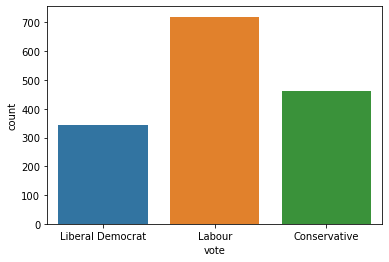

In [5]:
sns.countplot(x="vote", data=beps);

The Labor party won that election. This might be the reason why it's more represented here!

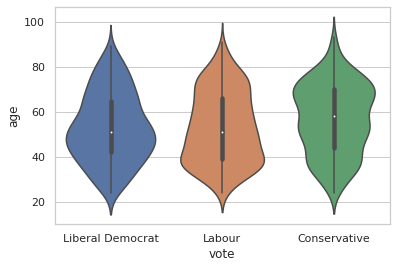

In [7]:
sns.set(style="whitegrid")
sns.violinplot(x="vote", y="age", data=beps);

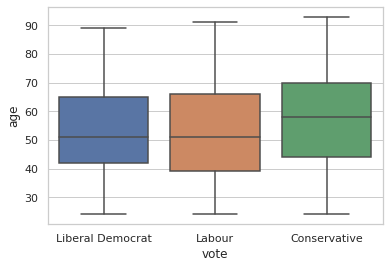

In [8]:
sns.boxplot(x="vote", y="age", data=beps);

We can tell from the above two graphs that the Conservate party voter's typical age is higher than that of the two other parties

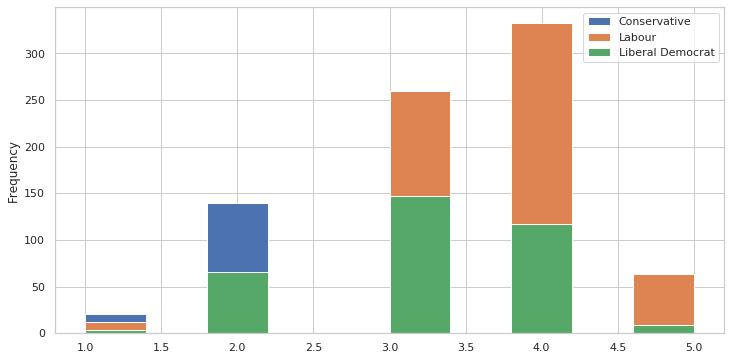

In [9]:
beps.groupby('vote')['nat_cond'].plot.hist(legend=True, figsize=FIG_SIZE);

It seems like the Labor's party voters were happier with the national economic conditions than the others, followed by the Liberal Democrat's

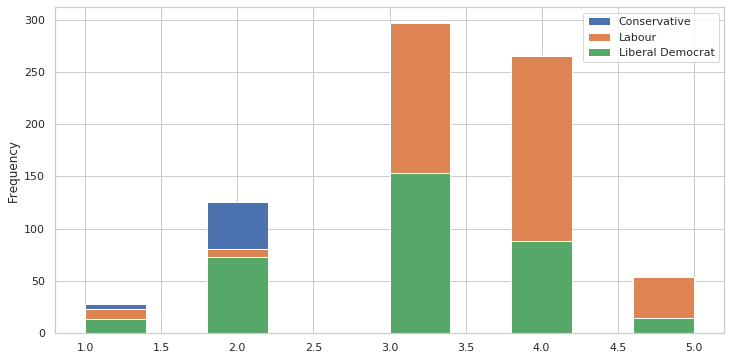

In [10]:
beps.groupby('vote')['hhold_cond'].plot.hist(legend=True, figsize=FIG_SIZE);

The public attitude towards household economic conditions reflects that towards national economic conditions

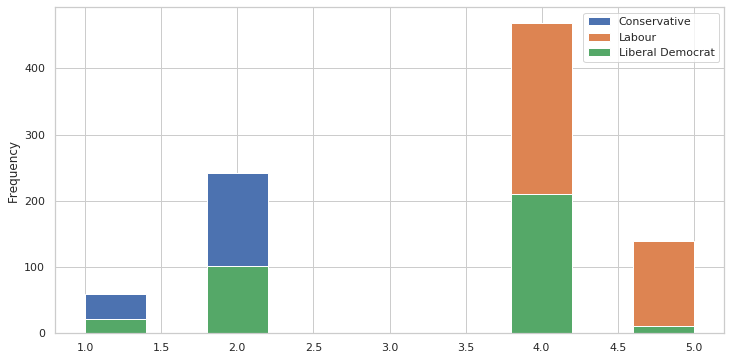

In [11]:
beps.groupby('vote')['labor_lead_assmnt'].plot.hist(legend=True, figsize=FIG_SIZE);

It seems like the Labor's leader (i.e. Tony Blair) was just fine, but the voters might wanted more, because even among the Labor's voters there were way more 4s than 5s. Also, it seems like he was more popular among the Libral Democrats than the Conservatives.

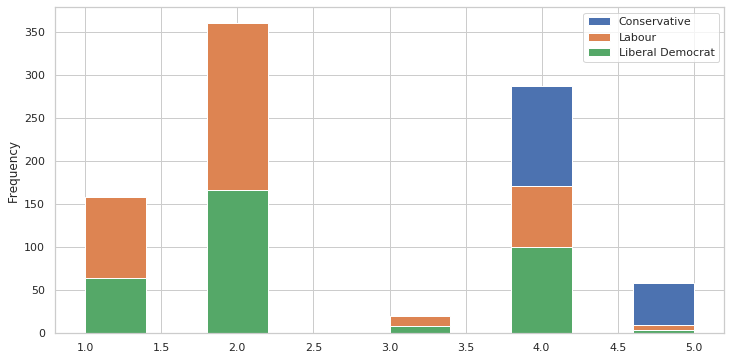

In [12]:
beps.groupby('vote')['cons_lead_assmnt'].plot.hist(legend=True, figsize=FIG_SIZE);

It doesn't seem like the conservative's leader (i.e. John Major) was more popular among Labour's voters than the Labour's leader was among the Conservatives!
But the Liberal Democrats seemed more into the Labour's leader than the Conservative's leader.

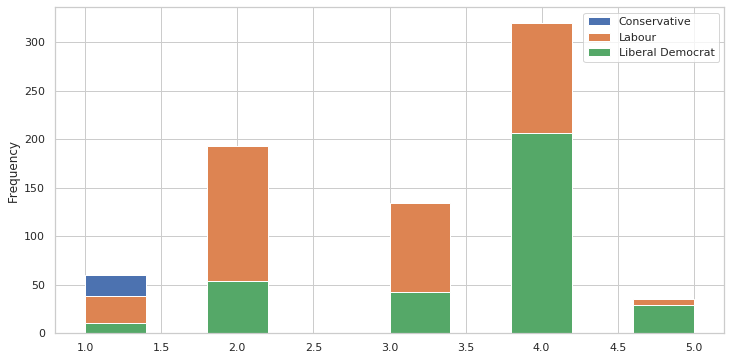

In [13]:
beps.groupby('vote')['democ_lead_assmnt'].plot.hist(legend=True, figsize=FIG_SIZE);

The Liberal Democrat's leader (i.e. Paddy Ashdown) seemed just fine, but not so popular even among Liberal Democrats or the Labour's voters.
But it obvious that the Conservatives didn't like him at all.

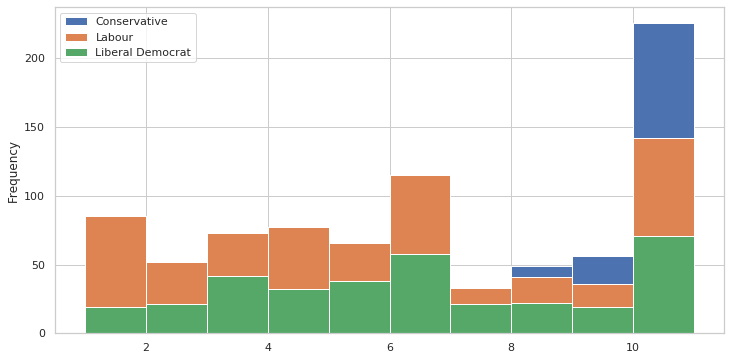

In [14]:
beps.groupby('vote')['euro_intg_attud'].plot.hist(legend=True, figsize=FIG_SIZE);

The most prominent attitude was the Conservatives attitude! There seemed very Eurosceptic! 

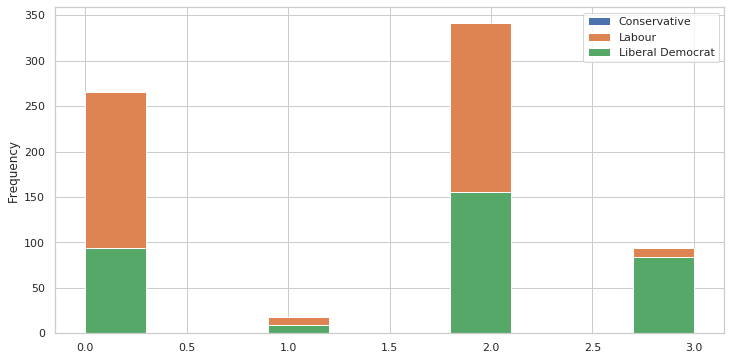

In [15]:
beps.groupby('vote')['political_knowledge'].plot.hist(legend=True, figsize=FIG_SIZE);

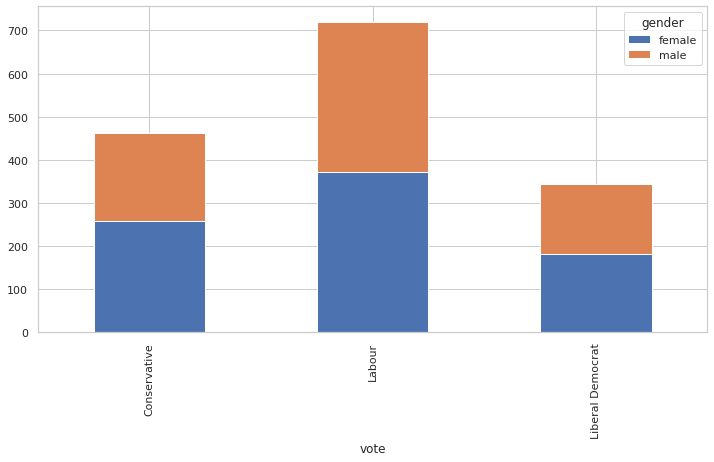

In [16]:
beps.groupby(['vote', 'gender'])['vote'].count().unstack('gender').plot.bar(stacked=True, figsize=FIG_SIZE);

The number of female voters in almost all the parties was almost half the number of male voters!

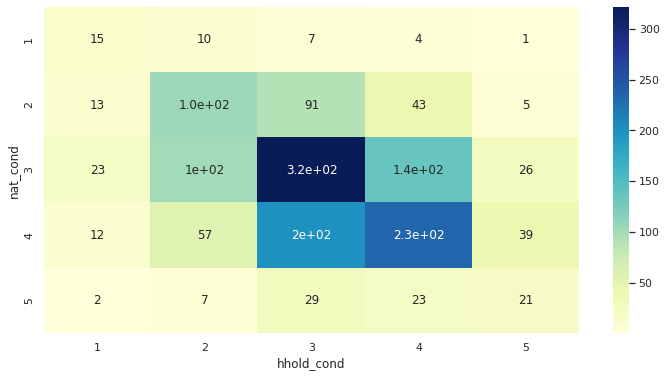

In [17]:
nat_hhold = beps.groupby(["nat_cond", "hhold_cond"])["nat_cond"].count()
plt.figure(figsize=FIG_SIZE)
sns.heatmap(nat_hhold.unstack("hhold_cond"), annot=True, cmap="YlGnBu");

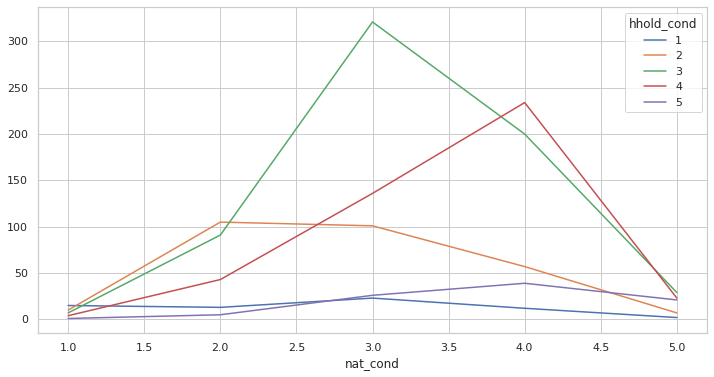

In [20]:
nat_hhold.unstack().plot(figsize=FIG_SIZE);

There doesn't seem to be a linear relationship between the 

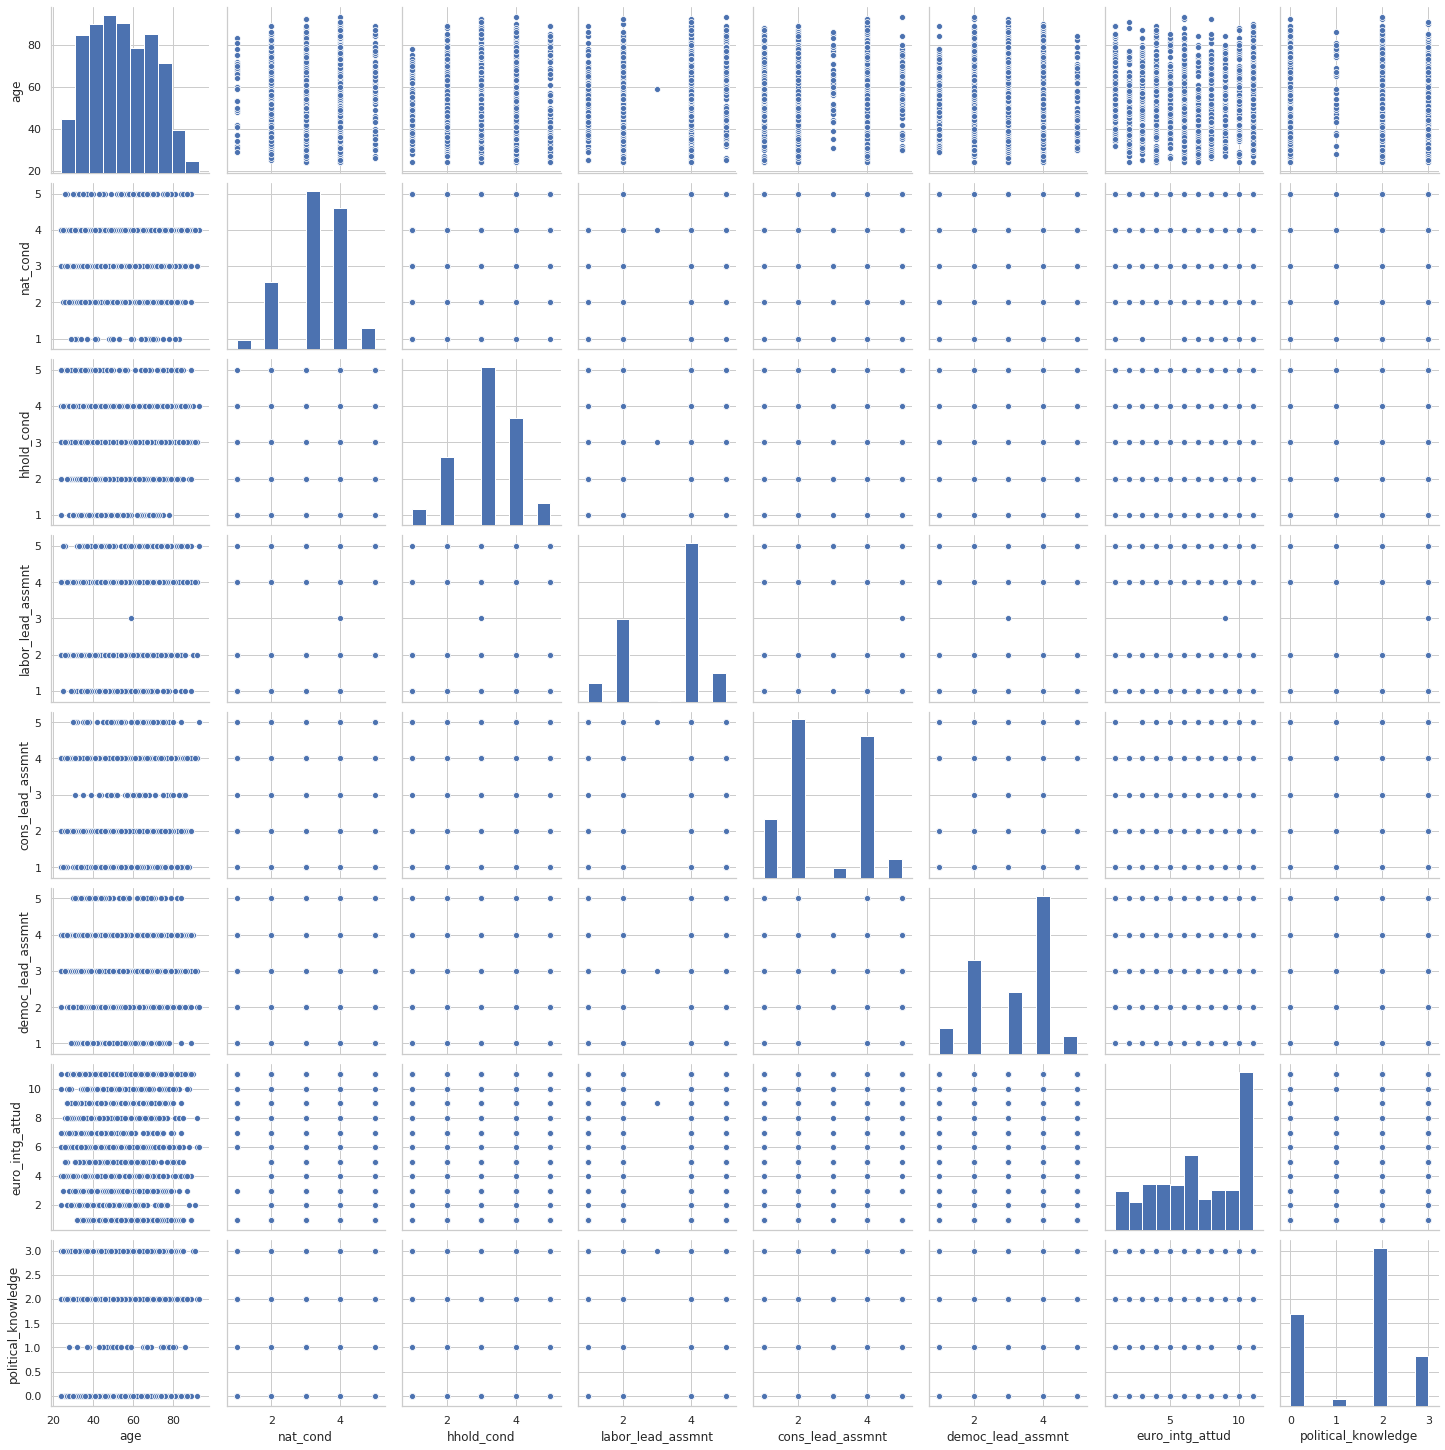

In [21]:
sns.pairplot(beps[['age', 'nat_cond', 'hhold_cond', 'labor_lead_assmnt', 'cons_lead_assmnt', 'democ_lead_assmnt', 'euro_intg_attud', 'political_knowledge']]);

There is no linear correlation between any pair of variables! Even between variables like age and attitudes toward European integration for example, or age and political knowledge!